In [1]:
#Import necessary packages:
import pandas as pd
import csv
import matplotlib.pyplot as plt   

In [2]:
#Loading .csv file to Pandas dataframe
adfood_eff= pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [3]:
#Exploring the data
adfood_eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null object
AEC_Event Start Date               53653 non-null object
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [4]:
#Exploring the data
adfood_eff.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [5]:
#Removing unwanted columns which are not useful for my prediction
adfood_eff= adfood_eff.drop(['PRI_Reported Brand/Product Name', 'RA_CAERS Created Date', 'AEC_Event Start Date', 'PRI_Product Role', 'PRI_FDA Industry Code'], axis=1)

In [6]:
#Renaming the columns
adfood_eff.columns= ['Report Number', 'Industry Name', 'Age', 'Age Unit', 'Gender', 'Outcomes', 'Symptoms']

In [7]:
#Extracting the serious and non-serious outcomes
adfood_eff['outcome']=((adfood_eff['Outcomes'].str.contains("(?:\s|^)HOSPITALIZATION(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)OTHER SERIOUS \(IMPORTANT MEDICAL EVENTS\)(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)LIFE THREATENING(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)SERIOUS INJURIES\/ ILLNESS(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)DISABILITY(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)DEATH(?:\s|$)"))|
                   (adfood_eff['Outcomes'].str.contains("(?:\s|^)CONGENITAL ANOMALY(?:\s|$)")))

In [8]:
#Converting the outcomes into binary values..
adfood_eff['Serious']= [1 if o==True else 0 for o in adfood_eff['outcome']]

In [9]:
#Dropping the unnecessary columns
adfood_eff= adfood_eff.drop(['outcome'], axis=1)

In [10]:
#Drop NaN values for Sumptoms
adfood_eff=adfood_eff.dropna(subset=['Symptoms'])

In [11]:
#Age units
adfood_eff['Age Unit'].unique()

array(['Year(s)', 'Not Available', 'Month(s)', 'Week(s)', 'Day(s)',
       'Decade(s)'], dtype=object)

In [12]:
#Converting all age into years
adfood_eff.loc[adfood_eff['Age Unit']=='Month(s)', 'Age']=  adfood_eff['Age']/10
adfood_eff.loc[adfood_eff['Age Unit']=='Week(s)', 'Age']=  adfood_eff['Age']/52.1429
adfood_eff.loc[adfood_eff['Age Unit']=='Day(s)', 'Age']=  adfood_eff['Age']/365
adfood_eff.loc[adfood_eff['Age Unit']=='Decade(s)', 'Age']=  adfood_eff['Age']*10 
adfood_eff['Age Unit']= 'Year(s)'

In [13]:
#Dropping the ages greater than 110 years
adfood_eff= adfood_eff.drop(adfood_eff[adfood_eff['Age']>110].index)

In [14]:
#Symptoms value counts
adfood_eff['Symptoms'].value_counts()

OVARIAN CANCER                                                                                                                                                                                                                                                          4571
CHOKING                                                                                                                                                                                                                                                                 1797
DIARRHOEA                                                                                                                                                                                                                                                               1345
VOMITING                                                                                                                                                                                         

In [15]:
#Creating dummy variables
adfood_eff['ABDOMINAL SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*DIARRHOEA,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*VOMITING,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ABDOMINAL,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PAIN,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DYSGEUSIA,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*RASH,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*NAUSEA,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*GASTROINTESTINAL,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*GASTRIC,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*MALAISE,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*LOOSE STOOLS,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BURNING SENSATION,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*FAECES,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*GASTROOESOPHAGEAL,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*GASTROENTERITIS,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*POTASSIUM,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*STOMACH,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*GASTRITIS,*(?:\s|$)")))

adfood_eff['CHEST/HEART RELATED SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*CHOKING,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BLOOD BILIRUBIN,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BLOOD PRESSURE,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*CHEST,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DYSPNEA,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*LOSS OF CONSCIOUSNESS,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HEART RATE,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PHARYNGEAL OEDEMA,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPERTENSION,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SYNCOPE,*(?:\s|$)"))|
                                   (adfood_eff['Symptoms'].str.contains("(?:\s|^)*MYOCARDIAL INFARCTION,*(?:\s|$)"))|
                                (adfood_eff['Symptoms'].str.contains("(?:\s|^)*FALL,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DYSPHAGIA,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ATRIAL,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPOTENSION,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*TACHYCARDIA,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PNEUMONIA,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ARRHYTHMIA,*(?:\s|$)"))|
                                    (adfood_eff['Symptoms'].str.contains("(?:\s|^)*CARDIAC,*(?:\s|$)")))
                                  

adfood_eff['COUGH/HEADACHE/DIZZINESS/NAUSEA']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*COUGH,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*VOMITING,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DIZZINESS,*(?:\s|$)"))|
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HEADACHE,*(?:\s|$)"))|                                                   
                                                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*NAUSEA,*(?:\s|$)"))|
                                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*WHEEZING,*(?:\s|$)"))|
                                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*FATIGUE,*(?:\s|$)"))|
                                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*RETCHING,*(?:\s|$)"))|
                                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*LETHARGY,*(?:\s|$)"))|
                                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*MAGRAINE,*(?:\s|$)")))

adfood_eff['CANCER']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CANCER,*(?:\s|$)"))

adfood_eff['IMMUNE SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*COELIAC DISEASE,*(?:\s|$)"))|
                               (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPERSENSITIVITY,*(?:\s|$)"))|
                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*TENDERNESS,*(?:\s|$)")))

adfood_eff['HAIR LOSS SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*ALOPECIA,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HAIR,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*TRICHORRHEXIS,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPOTRICHOSIS,*(?:\s|$)")))

adfood_eff['SKIN/BODY ALLERGIES']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*RASH,*(?:\s|$)"))|
                                   (adfood_eff['Symptoms'].str.contains("(?:\s|^)*URTICARIA,*(?:\s|$)"))|
                                   (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PRURITUS,*(?:\s|$)"))|
                                   (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SWELLING,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ERYTHEMA,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BODY TEMPERATURE,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BLISTER,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*FLUSHING,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SKIN,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HOT,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SWOLLEN,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*OEDEMA PERIPHERAL,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*INFECTION,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*INFLAMMATION,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ALLERGY,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPERAEMIA,*(?:\s|$)")))    

adfood_eff['ASTHENIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*ASTHENIA,*(?:\s|$)"))
adfood_eff['FOREIGN BODY TRAUMA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*FOREIGN BODY,*(?:\s|$)"))
adfood_eff['DEHYDRATION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*DEHYDRATION,*(?:\s|$)"))
adfood_eff['DYSPEPSIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*DYSPEPSIA,*(?:\s|$)"))
adfood_eff['PARAESTHESIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*PARAESTHESIA,*(?:\s|$)"))
adfood_eff['PALPITATIONS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*PALPITATIONS,*(?:\s|$)"))
adfood_eff['HYPERHIDROSIS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPERHIDROSIS,*(?:\s|$)"))
adfood_eff['CONSTIPATION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CONSTIPATION,*(?:\s|$)"))
adfood_eff['THROAT SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*THROAT,*(?:\s|$)"))|
                            (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PHARYNGITIS,*(?:\s|$)"))|
                            (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DYSPHONIA,*(?:\s|$)"))|
                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SPEECH,*(?:\s|$)"))|
                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ORAL,*(?:\s|$)")))
    
adfood_eff['FLATULENCE']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*FLATULENCE,*(?:\s|$)"))
adfood_eff['CHILLS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CHILLS,*(?:\s|$)"))

adfood_eff['INSOMNIA']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*INSOMNIA,*(?:\s|$)"))|
                        (adfood_eff['Symptoms'].str.contains("(?:\s|^)*SOMNOLENCE,*(?:\s|$)")))

adfood_eff['TREMOR']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*TREMOR,*(?:\s|$)"))
adfood_eff['HYPOAESTHESIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*HYPOAESTHESIA,*(?:\s|$)"))
adfood_eff['CONVULSION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CONVULSION,*(?:\s|$)"))
adfood_eff['JAUNDICE']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*JAUNDICE,*(?:\s|$)"))
adfood_eff['WEIGHT ALLERGIES']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*WEIGHT,*(?:\s|$)"))
adfood_eff['HAEMATOCHEZIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*HAEMATOCHEZIA,*(?:\s|$)"))
adfood_eff['PYREXIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*PYREXIA,*(?:\s|$)"))
adfood_eff['APPETITE SYMPTOMS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*APPETITE,*(?:\s|$)"))
adfood_eff['AMINOTRANSFERASE']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*AMINOTRANSFERASE,*(?:\s|$)"))
adfood_eff['ABNORMAL']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*ABNORMAL,*(?:\s|$)"))|
                        (adfood_eff['Symptoms'].str.contains("(?:\s|^)*FEAR,*(?:\s|$)"))|
                        (adfood_eff['Symptoms'].str.contains("(?:\s|^)*PANIC,*(?:\s|$)"))|
                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*IRRITABILITY,*(?:\s|$)"))|
                       (adfood_eff['Symptoms'].str.contains("(?:\s|^)*COLD SWEAT,*(?:\s|$)")))
                        

In [16]:
#Creating dummy variables
adfood_eff['HEPATIC ENZYME']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*HEPATIC ENZYME,*(?:\s|$)"))

adfood_eff['HAEMORRHAGE']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*HAEMORRHAGE,*(?:\s|$)"))|
                           (adfood_eff['Symptoms'].str.contains("(?:\s|^)*EPISTAXIS,*(?:\s|$)")))

adfood_eff['CEREBROVASCULAR SYSTOMS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CEREBROVASCULAR,*(?:\s|$)"))
adfood_eff['BACK BONES/MUSCLES']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*BACK,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*MYALGIA,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*ARTHRALGIA,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*MUSCULAR,*(?:\s|$)")))

adfood_eff['FOOD POISONING']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*FOOD POISONING,*(?:\s|$)"))
adfood_eff['VISION/EYE']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*VISION,*(?:\s|$)"))|
                         (adfood_eff['Symptoms'].str.contains("(?:\s|^)*EYE,*(?:\s|$)"))|
                         (adfood_eff['Symptoms'].str.contains("(?:\s|^)*VISUAL,*(?:\s|$)")))

adfood_eff['DEATH']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*DEATH,*(?:\s|$)"))|
                     (adfood_eff['Symptoms'].str.contains("(?:\s|^)*AGGRAVATED,*(?:\s|$)")))

adfood_eff['URINARY INFECTIONS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*CHROMATURIA,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*URINE,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*URINARY,*(?:\s|$)")))
    
adfood_eff['CONFUSIONAL STATE']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*CONFUSIONAL,*(?:\s|$)"))
adfood_eff['DIABETES']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*BLOOD GLUCOSE,*(?:\s|$)"))
adfood_eff['HOSPITALISATION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*HOSPITALISATION,*(?:\s|$)"))
adfood_eff['ANAPHYLACTIC REACTION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*ANAPHYLACTIC,*(?:\s|$)"))  



adfood_eff['BLOOD RELATED SYSTOMS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*BLOOD,*(?:\s|$)"))
adfood_eff['EMOTIONAL SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*EMOTIONAL,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*DEPRESSION,*(?:\s|$)")))
                                 

adfood_eff['INFLUENZA LIKE ILLNESS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*INFLUENZA,*(?:\s|$)"))
adfood_eff['NERVOUSNESS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*NERVOUSNESS,*(?:\s|$)"))
adfood_eff['GAIT DISTURBANCE']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*GAIT,*(?:\s|$)"))

adfood_eff['LIVER INFECTIONS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*LIVER,*(?:\s|$)"))|
                                (adfood_eff['Symptoms'].str.contains("(?:\s|^)*HEPATITIS,*(?:\s|$)")))
                                
adfood_eff['DISCOMFORT']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*DISCOMFORT,*(?:\s|$)"))|
                          (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BALANCE,*(?:\s|$)")))

adfood_eff['KIDNEY SYMPTOMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*RENAL,*(?:\s|$)"))|
                               (adfood_eff['Symptoms'].str.contains("(?:\s|^)*NEPHROLITHIASIS,*(?:\s|$)"))|
                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*KIDNEY,*(?:\s|$)"))|
                              (adfood_eff['Symptoms'].str.contains("(?:\s|^)*RHABDOMYOLYSIS,*(?:\s|$)")))

adfood_eff['DENTAL SYMPTOMS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*TOOTH,*(?:\s|$)"))
adfood_eff['SKIN/BODY INJURY']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*LACERATION,*(?:\s|$)"))|
                                (adfood_eff['Symptoms'].str.contains("(?:\s|^)*INJURY,*(?:\s|$)")))

adfood_eff['BREATHING PROBLEMS']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*ASTHMA,*(?:\s|$)"))|
                                  (adfood_eff['Symptoms'].str.contains("(?:\s|^)*BREATH,*(?:\s|$)"))|
                                 (adfood_eff['Symptoms'].str.contains("(?:\s|^)*WHEEZING,*(?:\s|$)")))


adfood_eff['EXAMINATION']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*PHYSICAL,*(?:\s|$)"))
adfood_eff['MEMORY INJURY']=((adfood_eff['Symptoms'].str.contains("(?:\s|^)*MEMORY,*(?:\s|$)"))|
                             (adfood_eff['Symptoms'].str.contains("(?:\s|^)*AMNESIA,*(?:\s|$)")))

adfood_eff['BLOOD CLOTTING']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*THROMBOSIS,*(?:\s|$)"))

adfood_eff['DAILING LIVING']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*ACTIVITIES OF DAILY LIVING,*(?:\s|$)"))
adfood_eff['PANCREATITIS']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*PANCREATITIS,*(?:\s|$)"))
adfood_eff['SALMONELLA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*SALMONELLA,*(?:\s|$)"))
adfood_eff['ABASIA']=(adfood_eff['Symptoms'].str.contains("(?:\s|^)*ABASIA,*(?:\s|$)"))


In [17]:
#List of unique symptoms
symptoms_list= ['DIARRHOEA','VOMITING','ABDOMINAL','PAIN','DYSGEUSIA','RASH','NAUSEA','GASTROINTESTINAL','GASTRIC','MALAISE'
                ,'LOOSE STOOLS','BURNING SENSATION','FAECES','GASTROOESOPHAGEAL','GASTROENTERITIS','POTASSIUM'
                ,'STOMACH','GASTRITIS','CHOKING','BLOOD BILIRUBIN','BLOOD PRESSURE','CHEST','DYSPNEA','LOSS OF CONSCIOUSNESS'
                ,'HEART RATE','PHARYNGEAL OEDEMA','HYPERTENSION','SYNCOPE','MYOCARDIAL INFARCTION','FALL','DYSPHAGIA','ATRIAL'
                ,'HYPOTENSION','TACHYCARDIA','PNEUMONIA','ARRHYTHMIA','CARDIAC','COUGH','VOMITING','DIZZINESS','HEADACHE'
                ,'NAUSEA','WHEEZING','FATIGUE','RETCHING','LETHARGY','MAGRAINE','CANCER','COELIAC DISEASE','HYPERSENSITIVITY'
                ,'TENDERNESS','ALOPECIA','HAIR','TRICHORRHEXIS','HYPOTRICHOSIS','RASH','URTICARIA','PRURITUS','SWELLING'
                ,'ERYTHEMA','BODY TEMPERATURE','BLISTER','FLUSHING','SKIN','HOT','SWOLLEN','OEDEMA PERIPHERAL','INFECTION'
                ,'INFLAMMATION','ALLERGY','HYPERAEMIA','ASTHENIA','FOREIGN BODY','DEHYDRATION','DYSPEPSIA','PARAESTHESIA'
                ,'PALPITATIONS','HYPERHIDROSIS','CONSTIPATION','THROAT','PHARYNGITIS','DYSPHONIA','SPEECH','ORAL','FLATULENCE'
                ,'CHILLS','INSOMNIA','SOMNOLENCE','TREMOR','HYPOAESTHESIA','CONVULSION','JAUNDICE','WEIGHT','HAEMATOCHEZIA'
                ,'PYREXIA','APPETITE','AMINOTRANSFERASE','ABNORMAL','FEAR','PANIC','IRRITABILITY','COLD SWEAT','HEPATIC ENZYME'
                ,'HAEMORRHAGE','EPISTAXIS','CEREBROVASCULAR','BACK','MYALGIA','ARTHRALGIA','MUSCULAR','FOOD POISONING','VISION'
                ,'EYE','VISUAL','DEATH','AGGRAVATED','CHROMATURIA','URINE','URINARY','CONFUSIONAL','BLOOD GLUCOSE'
                ,'HOSPITALISATION','ANAPHYLACTIC','BLOOD','EMOTIONAL','DEPRESSION','INFLUENZA','NERVOUSNESS','GAIT','LIVER'
                ,'HEPATITIS','DISCOMFORT','BALANCE','RENAL','NEPHROLITHIASIS','KIDNEY','RHABDOMYOLYSIS','TOOTH','LACERATION'
                ,'INJURY','ASTHMA','BREATH','WHEEZING','PHYSICAL','MEMORY','AMNESIA','THROMBOSIS','ACTIVITIES OF DAILY LIVING'
                ,'PANCREATITIS','SALMONELLA','ABASIA']

In [18]:
#String checker to create dummy variables
def stringChecker(stringList, word):
    truth_list = [string in word for string in stringList]
    return max(pd.Series(truth_list))
adfood_eff['symptoms_list']= adfood_eff['Symptoms'].apply(lambda x: stringChecker(symptoms_list, x))
adfood_eff['Other']= [False if symps==True else True for symps in adfood_eff['symptoms_list']]

In [19]:
#Dropping the unnecessary columns
adfood_eff= adfood_eff.drop(['symptoms_list'], axis=1)

In [20]:
#Exploring final data
adfood_eff.head()

,Report Number,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms,Serious,ABDOMINAL SYMPTOMS,CHEST/HEART RELATED SYMPTOMS,...,SKIN/BODY INJURY,BREATHING PROBLEMS,EXAMINATION,MEMORY INJURY,BLOOD CLOTTING,DAILING LIVING,PANCREATITIS,SALMONELLA,ABASIA,Other
0,65325,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",1,True,False,...,False,True,False,False,False,False,False,False,False,False
1,65325,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...",1,True,False,...,False,True,False,False,False,False,False,False,False,False
2,65333,Ice Cream Prod,NaN,Year(s),Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA",0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,65335,Baby Food Prod,0.3,Year(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING",0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,65336,Baby Food Prod,NaN,Year(s),Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION",0,True,False,...,False,False,True,False,False,False,False,False,False,False


#### Exploratory Data Analysis on the final dataset

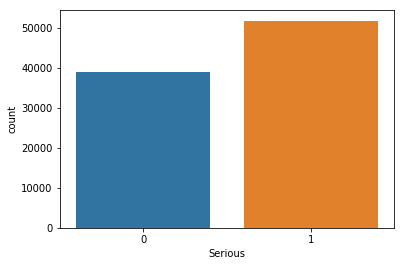

In [21]:
#Viaualization of number of outcomes 
import seaborn as sns
sns.countplot(x='Serious', data=adfood_eff)
plt.show()

In [22]:
#Percentage of serious and non-serious
count_serious= len(adfood_eff[adfood_eff['Serious']==1])
count_non_serious= len(adfood_eff[adfood_eff['Serious']==0])
percent_serious= count_serious/len(adfood_eff)
print("percentage of serious reports is", percent_serious*100)
percent_non_serious= count_non_serious/len(adfood_eff)
print("percentage of non_serious reports is", percent_non_serious*100)

percentage of serious reports is 57.07376724099943
percentage of non_serious reports is 42.92623275900057


In [23]:
# mean and median of age
print('The mean of "Age" is %.2f' %(adfood_eff["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(adfood_eff["Age"].median(skipna=True)))

The mean of "Age" is 50.37
The median of "Age" is 53.00


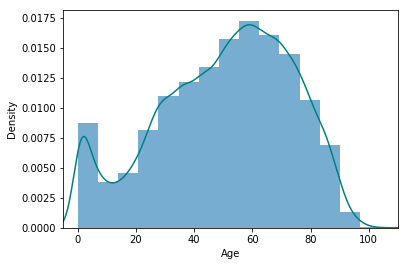

In [24]:
#Distribution of age
ax = adfood_eff["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
adfood_eff["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-5,110)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(-20, 115)

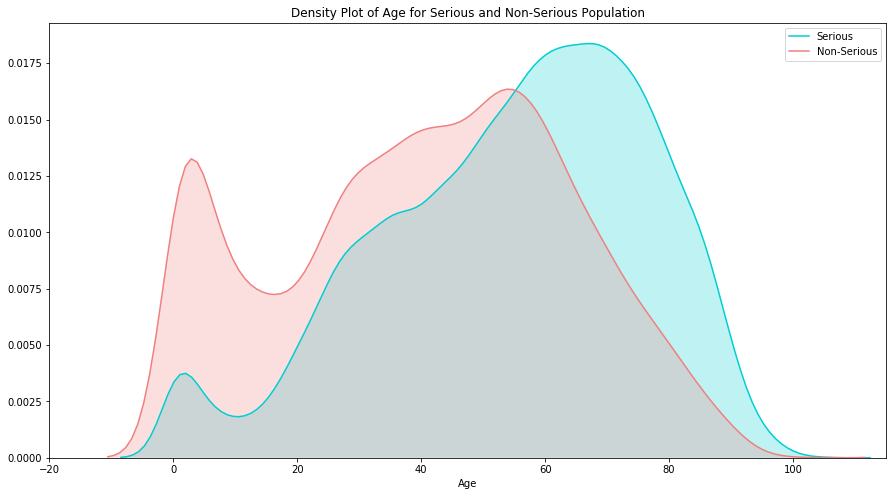

In [25]:
#Density plot
plt.figure(figsize=(15,8))
ax = sns.kdeplot(adfood_eff["Age"][adfood_eff.Serious == 1], color="darkturquoise", shade=True)
sns.kdeplot(adfood_eff["Age"][adfood_eff.Serious == 0], color="lightcoral", shade=True)
plt.legend(['Serious', 'Non-Serious'])
plt.title('Density Plot of Age for Serious and Non-Serious Population')
ax.set(xlabel='Age')
plt.xlim(-20,115)

Text(0,0.5,'Frequency of Serious and Non-Serious')

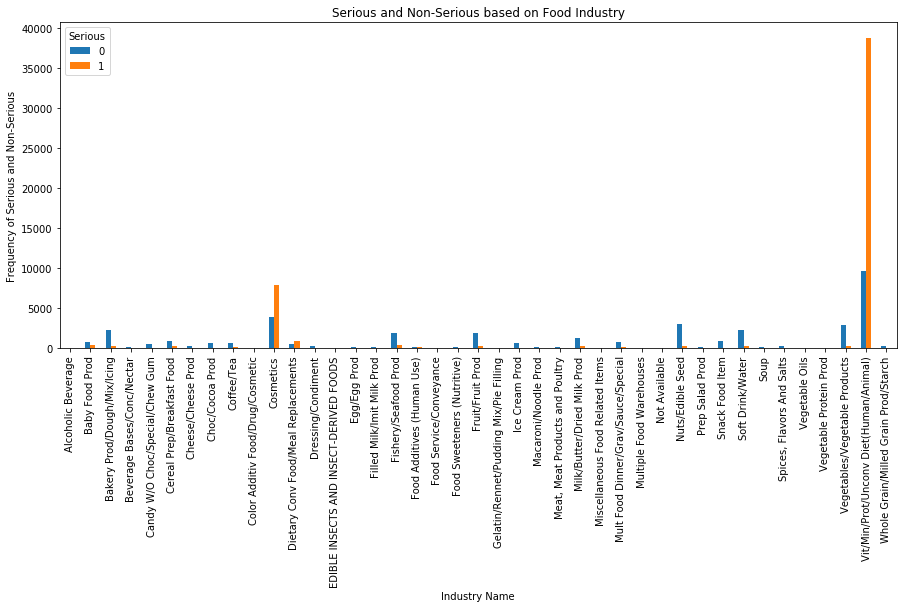

In [26]:
#Visualization of serious and non-serious based on industry
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,6)
pd.crosstab(adfood_eff['Industry Name'],adfood_eff['Serious']).plot(kind='bar')
plt.title('Serious and Non-Serious based on Food Industry')
plt.xlabel('Industry Name')
plt.ylabel('Frequency of Serious and Non-Serious')

#### Creating Dummy variables to get prepared for the model

In [27]:
#Creating dummy variables for remaining string columns
cat_vars=['Industry Name','Gender','Age Unit']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(adfood_eff[var], prefix=var)
    adfood_eff1=adfood_eff.join(cat_list)
    adfood_eff=adfood_eff1

In [28]:
#Creating dummy variables for remaining string columns
cat_vars=['Industry Name','Gender','Age Unit']
adfood_eff_vars=adfood_eff.columns.values.tolist()
to_keep=[i for i in adfood_eff_vars if i not in cat_vars]

In [29]:
#Final values and coulmns
adfood_eff_final=adfood_eff[to_keep]
adfood_eff_final.columns.values

array(['Report Number', 'Age', 'Outcomes', 'Symptoms', 'Serious',
       'ABDOMINAL SYMPTOMS', 'CHEST/HEART RELATED SYMPTOMS',
       'COUGH/HEADACHE/DIZZINESS/NAUSEA', 'CANCER', 'IMMUNE SYMPTOMS',
       'HAIR LOSS SYMPTOMS', 'SKIN/BODY ALLERGIES', 'ASTHENIA',
       'FOREIGN BODY TRAUMA', 'DEHYDRATION', 'DYSPEPSIA', 'PARAESTHESIA',
       'PALPITATIONS', 'HYPERHIDROSIS', 'CONSTIPATION', 'THROAT SYMPTOMS',
       'FLATULENCE', 'CHILLS', 'INSOMNIA', 'TREMOR', 'HYPOAESTHESIA',
       'CONVULSION', 'JAUNDICE', 'WEIGHT ALLERGIES', 'HAEMATOCHEZIA',
       'PYREXIA', 'APPETITE SYMPTOMS', 'AMINOTRANSFERASE', 'ABNORMAL',
       'HEPATIC ENZYME', 'HAEMORRHAGE', 'CEREBROVASCULAR SYSTOMS',
       'BACK BONES/MUSCLES', 'FOOD POISONING', 'VISION/EYE', 'DEATH',
       'URINARY INFECTIONS', 'CONFUSIONAL STATE', 'DIABETES',
       'HOSPITALISATION', 'ANAPHYLACTIC REACTION',
       'BLOOD RELATED SYSTOMS', 'EMOTIONAL SYMPTOMS',
       'INFLUENZA LIKE ILLNESS', 'NERVOUSNESS', 'GAIT DISTURBANCE',
      

#### Buiding the Random Forest Model to Predict the Serious and Non Serious reports

In [30]:
#Splitting the data for model evaluation
from sklearn.model_selection import train_test_split
adfood_eff_train, adfood_eff_test = train_test_split(adfood_eff_final, test_size=0.3, random_state=42)

In [31]:
#Creating Final test dataset
adfood_eff_Finaltest= adfood_eff_test.drop(['Serious', 'Symptoms', 'Outcomes'], axis=1)

In [32]:
#Creating target and feature variables
X= adfood_eff_train.drop(['Serious', 'Symptoms', 'Outcomes'], axis=1)
y= adfood_eff_train['Serious']

In [33]:
#Expermenting the Randomforest model and fitting the train data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

imp=Imputer(missing_values='NaN', strategy='mean', axis=0)


#Randomforest Classifier
clf= RandomForestClassifier(n_jobs=5, random_state=2)

steps= [('imputation', imp), ('Random Forest', clf)]
pipe=Pipeline(steps)

pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...estimators=10, n_jobs=5,
            oob_score=False, random_state=2, verbose=0, warm_start=False))])

In [35]:
#Printing the scores for the model
print('Score: ', pipe.score(X, y))

Score:  0.9913440352533837


In [36]:
#Random forest model evaluation with cross validation and GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
scoring = {'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

#Randomforest Classifier
clf= RandomForestClassifier(n_jobs=5, random_state=2, oob_score = True)

#Assigning the parameters
param_grid = { 
    'Random Forest__n_estimators': [200, 700],
    'Random Forest__max_features': ['auto', 'sqrt', 'log2']
}

#Buiding a pipeline for imputation and classification
forest_clf_pipe = Pipeline(steps=[('imputation', imp), ('Random Forest',clf)])

#GridSearchCV model evaluation

forest_clf = GridSearchCV(estimator=forest_clf_pipe, cv=5,
              param_grid=param_grid, )
#Fitting the model on the train data
forest_clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputation', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0..._estimators=10, n_jobs=5,
            oob_score=True, random_state=2, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'Random Forest__n_estimators': [200, 700], 'Random Forest__max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
#Final test on the testing data
adfood_eff_Finaltest['Serious'] = forest_clf.predict(adfood_eff_Finaltest)

Final_report = adfood_eff_Finaltest[['Report Number','Serious']]

Final_report.to_csv("Final_report.csv", index=False)
#Printing the Final report
Final_report.tail()

,Report Number,Serious
51621,174989,0
14522,106801,1
32372,146616,1
31724,145318,0
13206,103814,1


In [38]:
sorted(pipe.get_params().keys())

['Random Forest',
 'Random Forest__bootstrap',
 'Random Forest__class_weight',
 'Random Forest__criterion',
 'Random Forest__max_depth',
 'Random Forest__max_features',
 'Random Forest__max_leaf_nodes',
 'Random Forest__min_impurity_decrease',
 'Random Forest__min_impurity_split',
 'Random Forest__min_samples_leaf',
 'Random Forest__min_samples_split',
 'Random Forest__min_weight_fraction_leaf',
 'Random Forest__n_estimators',
 'Random Forest__n_jobs',
 'Random Forest__oob_score',
 'Random Forest__random_state',
 'Random Forest__verbose',
 'Random Forest__warm_start',
 'imputation',
 'imputation__axis',
 'imputation__copy',
 'imputation__missing_values',
 'imputation__strategy',
 'imputation__verbose',
 'memory',
 'steps']